In [9]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


import numpy as np
import numpy.ma as ma
from scipy import linalg
from numpy.linalg import inv
import pandas as pd

np.seterr(divide='ignore')
np.seterr(over='ignore')


{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'warn'}

In [119]:
from importlib import reload

In [1]:
import gloesspy3 as gf

In [125]:
reload(gf)

<module 'gloesspy3' from '/Users/vs522/Dropbox/Python/oo_gloess/gloesspy3.py'>

In [121]:
old_gloess_bands = ['U', 'B', 'V', 'R', 'I', 'J','H', 'Ks', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4']
filters = np.array(old_gloess_bands)
names = gf.set_up_dataframe_cols(filters)

In [39]:
df.columns

Index(['MJD', 'mag_U', 'err_U', 'mag_B', 'err_B', 'mag_V', 'err_V', 'mag_R',
       'err_R', 'mag_I', 'err_I', 'mag_J', 'err_J', 'mag_H', 'err_H', 'mag_K',
       'err_K', 'mag_IRAC1', 'err_IRAC1', 'mag_IRAC2', 'err_IRAC2',
       'mag_IRAC3', 'err_IRAC3', 'mag_IRAC4', 'err_IRAC4', 'Reference'],
      dtype='object')

In [41]:
for col in df.columns:
    if 'mag' in col:
        
        print(col)

mag_U
mag_B
mag_V
mag_R
mag_I
mag_J
mag_H
mag_K
mag_IRAC1
mag_IRAC2
mag_IRAC3
mag_IRAC4


In [97]:
def clean_old_gloess_file(filename):
    df, period, smoothing = gf.old_gloess_to_df(filename, ref_col=True)
    bad_refs = []
    bad_ref_files = ['bad_references_list.txt', 'johnson_system_references.txt', 'not_irac_references.txt']
    for file in bad_ref_files:
        with open('/Users/vs522/Dropbox/Python/oo_gloess/'+file) as fn:
            for line in fn:
                line = line.strip()
                bad_refs.append(line)
    df = df[~df['Reference'].isin(bad_refs)]
    df['MJD'].replace(-99.99, np.NaN, inplace=True)
    for col in df.columns:
        if 'mag' in col:
            df[col].replace(99.99, np.NaN, inplace=True)
        #if 'err' in col:
         #   df[col].replace(9.99, np.NaN, inplace=True)
    df.dropna(subset=['MJD'], inplace=True)
    return(df, period, smoothing)


In [4]:
mw_ceps_folder = '/Users/vs522/Dropbox/All_Cepheids_ever/MilkyWay/cepheids/'

In [5]:
test_star = 'TW NOR'

In [6]:
test_input_file = mw_ceps_folder + test_star

In [7]:
test_input_file

'/Users/vs522/Dropbox/All_Cepheids_ever/MilkyWay/cepheids/TW NOR'

In [43]:
df, period, smoothing = clean_old_gloess_file(test_input_file)

True


In [44]:
df

,MJD,mag_U,err_U,mag_B,err_B,mag_V,err_V,mag_R,err_R,mag_I,...,err_K,mag_IRAC1,err_IRAC1,mag_IRAC2,err_IRAC2,mag_IRAC3,err_IRAC3,mag_IRAC4,err_IRAC4,Reference
0,2441761.792,14.97,NaN,13.38,NaN,11.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
1,2441762.853,15.19,NaN,13.54,NaN,11.54,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
2,2441763.843,15.74,NaN,13.81,NaN,11.72,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
3,2441764.844,16.15,NaN,14.25,NaN,12.03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
4,2441765.836,16.26,NaN,14.31,NaN,12.09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2442518.722,15.42,NaN,13.81,NaN,11.75,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1976ApJ...208..765V
161,2442519.745,16.03,NaN,13.99,NaN,11.83,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1976ApJ...208..765V
162,2442520.726,16.44,NaN,14.29,NaN,12.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1976ApJ...208..765V
163,2442521.714,16.38,NaN,14.33,NaN,12.18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1976ApJ...208..765V


In [13]:
len(df)

117

original input TW NOR file was 181 lines (including the 4 line header), cleaned df is 117 rows.

In [14]:
monson_phot = pd.read_csv('/Users/vs522/OneDrive - University of Bath/Gaia_Cepheids/DR3/MW_Cep_old_gloess/Monson12_table2_full.csv')


In [17]:
monson_phot['cep_name'] = monson_phot['cep_name'].str.lstrip(' ')
monson_phot['cep_name'] = monson_phot['cep_name'].str.rstrip(' ')
monson_phot['MJD'] = monson_phot['hmjd'] + 2400000.5


In [18]:
monson_phot

,cep_name,hmjd,mag_IRAC1,err_IRAC1,mag_IRAC2,err_IRAC2,MJD
0,beta Dor,55138.0119,1.809,0.019,1.793,0.010,2.455139e+06
1,beta Dor,55140.2499,1.779,0.021,1.819,0.004,2.455141e+06
2,beta Dor,55140.9730,1.805,0.018,1.864,0.006,2.455141e+06
3,beta Dor,55142.0659,1.876,0.019,1.939,0.007,2.455143e+06
4,beta Dor,55142.8811,1.933,0.009,1.969,0.008,2.455143e+06
...,...,...,...,...,...,...,...
882,l Car,55328.5307,0.823,0.012,1.003,0.007,2.455329e+06
883,l Car,55329.8869,0.861,0.012,1.035,0.004,2.455330e+06
884,l Car,55330.9327,0.869,0.016,1.043,0.008,2.455331e+06
885,l Car,55333.3785,0.917,0.017,1.099,0.009,2.455334e+06


In [20]:
monson_phot.cep_name.unique()

array(['beta Dor', 'CD Cyg', 'CEa Cas', 'CEb Cas', 'CF Cas', 'CV Mon',
       'delta Cep', 'DL Cas', 'eta Aql', 'FF Aql', 'GY Sge', 'RT Aur',
       'RU Sct', 'SV Vul', 'SZ Aql', 'S Nor', 'S Sge', 'S Vul', 'TT Aql',
       'TW Nor', 'T Mon', 'T Vul', 'U Aql', 'U Car', 'U Sgr', 'U Vul',
       'V340 Nor', 'V367 Sct', 'V Cen', 'WZ Sgr', 'W Sgr', 'X Cyg',
       'X Sgr', 'Y Oph', 'Y Sgr', 'zeta Gem', 'l Car'], dtype=object)

In [24]:
df['mag_IRAC1'].dropna()

Series([], Name: mag_IRAC1, dtype: float64)

In [28]:
monson_phot[monson_phot.cep_name.str.upper()==test_star]

,cep_name,hmjd,mag_IRAC1,err_IRAC1,mag_IRAC2,err_IRAC2,MJD
456,TW Nor,55300.3908,6.048,0.008,6.080,0.008,2.455301e+06
457,TW Nor,55301.6323,6.086,0.009,6.153,0.009,2.455302e+06
458,TW Nor,55303.1904,6.191,0.002,6.274,0.004,2.455304e+06
459,TW Nor,55304.5523,6.277,0.007,6.298,0.009,2.455305e+06
460,TW Nor,55305.4776,6.286,0.016,6.256,0.012,2.455306e+06
461,TW Nor,55306.6149,6.234,0.012,6.197,0.007,2.455307e+06
462,TW Nor,55307.7219,6.139,0.011,6.099,0.008,2.455308e+06
463,TW Nor,55309.1554,6.099,0.015,6.059,0.012,2.455310e+06
464,TW Nor,55311.0973,6.049,0.012,6.075,0.006,2.455312e+06
465,TW Nor,55311.2882,6.048,0.006,6.087,0.007,2.455312e+06


In [45]:
updated_df = pd.merge(left = df, right = monson_phot[monson_phot.cep_name.str.upper()==test_star][['MJD', 'mag_IRAC1', 'err_IRAC1', 'mag_IRAC2', 'err_IRAC2']], \
    on='MJD', how="outer")

In [46]:
updated_df

,MJD,mag_U,err_U,mag_B,err_B,mag_V,err_V,mag_R,err_R,mag_I,...,err_IRAC2_x,mag_IRAC3,err_IRAC3,mag_IRAC4,err_IRAC4,Reference,mag_IRAC1_y,err_IRAC1_y,mag_IRAC2_y,err_IRAC2_y
0,2.441762e+06,14.97,NaN,13.38,NaN,11.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M,NaN,NaN,NaN,NaN
1,2.441763e+06,15.19,NaN,13.54,NaN,11.54,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M,NaN,NaN,NaN,NaN
2,2.441764e+06,15.74,NaN,13.81,NaN,11.72,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M,NaN,NaN,NaN,NaN
3,2.441765e+06,16.15,NaN,14.25,NaN,12.03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M,NaN,NaN,NaN,NaN
4,2.441766e+06,16.26,NaN,14.31,NaN,12.09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2.455324e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.091,0.006,6.163,0.005
137,2.455325e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.202,0.005,6.280,0.010
138,2.455326e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.261,0.013,6.307,0.006
139,2.455328e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.283,0.010,6.251,0.007


In [54]:
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

drop_y(updated_df)

def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(updated_df)

In [55]:
updated_df

,MJD,mag_U,err_U,mag_B,err_B,mag_V,err_V,mag_R,err_R,mag_I,...,err_K,mag_IRAC1,err_IRAC1,mag_IRAC2,err_IRAC2,mag_IRAC3,err_IRAC3,mag_IRAC4,err_IRAC4,Reference
0,2.441762e+06,14.97,NaN,13.38,NaN,11.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
1,2.441763e+06,15.19,NaN,13.54,NaN,11.54,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
2,2.441764e+06,15.74,NaN,13.81,NaN,11.72,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
3,2.441765e+06,16.15,NaN,14.25,NaN,12.03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
4,2.441766e+06,16.26,NaN,14.31,NaN,12.09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975ApJS...29..219M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2.455324e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,2.455325e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,2.455326e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,2.455328e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
updated_df.columns

Index(['MJD', 'mag_U', 'err_U', 'mag_B', 'err_B', 'mag_V', 'err_V', 'mag_R',
       'err_R', 'mag_I', 'err_I', 'mag_J', 'err_J', 'mag_H', 'err_H', 'mag_K',
       'err_K', 'mag_IRAC1', 'err_IRAC1', 'mag_IRAC2', 'err_IRAC2',
       'mag_IRAC3', 'err_IRAC3', 'mag_IRAC4', 'err_IRAC4', 'Reference'],
      dtype='object')

In [49]:
monson_phot['mag_IRAC1']

0      1.809
1      1.779
2      1.805
3      1.876
4      1.933
       ...  
882    0.823
883    0.861
884    0.869
885    0.917
886    0.925
Name: mag_IRAC1, Length: 887, dtype: float64

In [50]:
df['mag_IRAC1']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
160   NaN
161   NaN
162   NaN
163   NaN
175   NaN
Name: mag_IRAC1, Length: 117, dtype: float64

In [57]:
gaia_ids = mw_ceps_folder + 'all_mw_ceps_gaiadr3.csv'
mw_df = pd.read_csv(gaia_ids)

In [60]:
mw_df[mw_df['has_epoch_photometry']==True]

,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,radial_velocity,...,ebpminrp_gspphot,target_id,target_ra,target_dec,target_parallax,target_pm_ra,target_pm_dec,target_radial_velocity,epoch,target_separation (deg)
0,473239154746762112,56.534386,58.784221,0.212830,-0.022212,-0.533283,1.275651,11.554028,1.663499,-40.787838,...,1.0438,AB CAM,56.534386,58.784223,0.2128,-0.022,-0.533,-36.12,2000.0,1.567742e-09
1,4260210878780635904,280.340671,-1.111234,0.240796,-1.162102,-2.499565,0.951705,11.081848,2.816885,-57.355167,...,1.4787,AA SER,280.340676,-1.111223,0.2408,-1.162,-2.500,-45.40,2000.0,1.991009e-09
2,5834406243567769472,237.359031,-57.662225,0.193470,-3.725185,-2.773851,1.357582,13.362621,1.670068,-103.279564,...,1.0370,AA NOR,237.359062,-57.662213,0.1935,-3.725,-2.774,0.00,2000.0,1.047429e-09
3,3102535635624415872,104.349041,-3.843336,0.313935,0.140999,1.140449,1.162529,12.185216,1.868644,70.064790,...,1.2863,AA MON,104.349041,-3.843341,0.3139,0.141,1.140,0.00,2000.0,1.991911e-09
4,3430067092837622272,91.645608,26.329220,0.274911,-0.216644,-0.669852,1.249173,9.393121,1.363424,NaN,...,0.5586,AA GEM,91.645609,26.329223,0.2749,-0.217,-0.670,17.00,2000.0,1.713362e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,3127142323596470144,99.270189,3.063962,0.567491,0.348998,-0.666023,1.099588,9.701135,1.824931,9.351947,...,0.5633,CV MON,99.270187,3.063965,0.5675,0.349,-0.666,19.20,2000.0,1.046954e-10
648,5981406000300438016,241.230095,-51.953527,0.317522,-1.890785,-2.805966,0.891097,10.565082,2.591659,NaN,...,NaN,TW NOR,241.230109,-51.953515,0.3175,-1.891,-2.806,-56.10,2000.0,9.759904e-10
649,3126331060113010560,103.100006,2.707082,0.192693,0.187182,0.550848,1.360780,12.369353,1.577010,62.221493,...,0.9132,V784 MON,103.100005,2.707079,0.1927,0.187,0.551,64.42,2000.0,1.051943e-09
651,5863004266032776064,192.660923,-63.076250,0.617706,-2.766232,-6.649585,0.952197,10.324223,3.842864,34.301037,...,NaN,BX CRU,192.660950,-63.076221,0.6177,-2.766,-6.650,0.00,2000.0,2.103975e-09


In [61]:
mw_df.columns

Index(['source_id', 'ra', 'dec', 'parallax', 'pmra', 'pmdec', 'ruwe',
       'phot_g_mean_mag', 'bp_rp', 'radial_velocity', 'phot_variable_flag',
       'non_single_star', 'has_xp_continuous', 'has_xp_sampled', 'has_rvs',
       'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot',
       'has_mcmc_msc', 'teff_gspphot', 'logg_gspphot', 'mh_gspphot',
       'distance_gspphot', 'azero_gspphot', 'ag_gspphot', 'ebpminrp_gspphot',
       'target_id', 'target_ra', 'target_dec', 'target_parallax',
       'target_pm_ra', 'target_pm_dec', 'target_radial_velocity', 'epoch',
       'target_separation (deg)'],
      dtype='object')

In [195]:
def new_gloess_inc_gaia(cepname):
    cap_cepheid = str.upper(cepname)
    print(cap_cepheid)
    fn = mw_ceps_folder + cap_cepheid
    if os.path.exists(fn):
        df, period, smoothing = clean_old_gloess_file(fn)
        #gloess_no_irac = df[['MJD', 'mag_U', 'err_U', 'mag_B', 'err_B', 'mag_V', 'err_V', 'mag_R',
       #'err_R', 'mag_I', 'err_I', 'mag_J', 'err_J', 'mag_H', 'err_H', 'mag_K',
       #'err_K']]
        ir_df = monson_phot[monson_phot.cep_name == cepname][['MJD', 'mag_IRAC1', 'err_IRAC1', 'mag_IRAC2', 'err_IRAC2']]
        df2 = pd.merge(left = df, right = ir_df, on='MJD', how="outer")

        to_drop = [x for x in df2 if x.endswith('_x')]
        df2.drop(to_drop, axis=1, inplace=True)
        for col in df2:
            if col.endswith('_y'):
                df2.rename(columns={col:col.rstrip('_y')}, inplace=True)
        

        #for col in ['mag_G', 'err_G', 'mag_BP', 'err_BP', 'mag_RP', 'err_RP']:
        #    df2[col] = np.NaN
        
        if mw_df[mw_df.target_id==cap_cepheid]["has_epoch_photometry"].values[0] ==True:
            source_id = str(mw_df[mw_df.target_id==cap_cepheid]['source_id'].values[0])
            print(source_id)
            gaia_df = gf.read_gaia_epoch_photometry_from_query(source_id)
            gloess_input = pd.merge(left = df2, right = gaia_df[['MJD', 'mag_G', 'err_G', 'mag_BP', 'err_BP', 'mag_RP', 'err_RP']], on='MJD', how="outer")
        else:
            gloess_input = df2
            
            
    return(gloess_input, gaia_df, period, smoothing, ir_df)
        
        
    
    

In [190]:
gloess_input.mag_IRAC1.dropna()

Series([], Name: mag_IRAC1, dtype: float64)

In [196]:
test_star = 'CD Cyg'
gloess_input, gaia_df, period, smoothing, ir_df = new_gloess_inc_gaia(test_star)

CD CYG
True
2058374144759464064


In [197]:
ir_df

,MJD,mag_IRAC1,err_IRAC1,mag_IRAC2,err_IRAC2
24,2.455148e+06,5.618,0.010,5.733,0.004
25,2.455148e+06,5.659,0.012,5.740,0.007
26,2.455149e+06,5.675,0.011,5.728,0.007
27,2.455150e+06,5.723,0.015,5.730,0.004
28,2.455151e+06,5.713,0.017,5.696,0.008
29,2.455151e+06,5.587,0.020,5.555,0.007
30,2.455152e+06,5.543,0.018,5.514,0.008
31,2.455153e+06,5.528,0.010,5.505,0.007
32,2.455154e+06,5.463,0.011,5.446,0.005
33,2.455154e+06,5.447,0.016,5.423,0.008


In [198]:
gloess_input

,MJD,mag_U,err_U,mag_B,err_B,mag_V,err_V,mag_R,err_R,mag_I,...,mag_IRAC1,err_IRAC1,mag_IRAC2,err_IRAC2,mag_G,err_G,mag_BP,err_BP,mag_RP,err_RP
0,2.443630e+06,11.02,9.99,9.99,9.99,8.68,9.99,NaN,9.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.443706e+06,12.59,9.99,11.13,9.99,9.45,9.99,NaN,9.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.443714e+06,10.78,9.99,9.78,9.99,8.57,9.99,NaN,9.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.443721e+06,12.32,9.99,10.79,9.99,9.21,9.99,NaN,9.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.443725e+06,NaN,9.99,11.17,9.99,9.54,9.99,NaN,9.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2.457823e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.607193,0.002882
327,2.457823e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.625489,0.002893
328,2.457849e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.232292,0.003245
329,2.457850e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.217318,0.002984


In [199]:

filters = ['U', 'B', 'V', 'R', 'I', 'J','H', 'Ks', 'IRAC1', 'IRAC2', 'G', 'BP', 'RP']
#filters = ['U', 'B', 'V', 'R', 'I', 'J','H', 'K']#, 'IRAC1', 'IRAC2', 'G', 'BP', 'RP']
#filters = ['V']

fit_results = np.full([len(filters), 500], np.nan)



for i in range(len(filters)):
    print(i)
    band = filters[i]
    print(band)
    mag_col = 'mag_' + band
    err_col = 'err_' + band
    xx = gloess_input['MJD']
    yy = gloess_input[mag_col]
    yerr = gloess_input[err_col]
    if len(yy.dropna() > 0):
        print(len(yy.dropna()))
        gloess = gf.Gloess(xx, yy, yerr, period, smooth='auto', degree=2)
        fit_results[i] = gloess.fit_one_band()

0
U
46
1
B
96
2
V
115
3
R
25
4
I
18
5
J
46
6
H
46
7
Ks
46
8
IRAC1
24
9
IRAC2
24
10
G
50
11
BP
48
12
RP
48


In [96]:
#gloess.yerr[np.isnan(gloess.yerr)] = 9.9999

Text(0, 0.5, 'Magnitude')

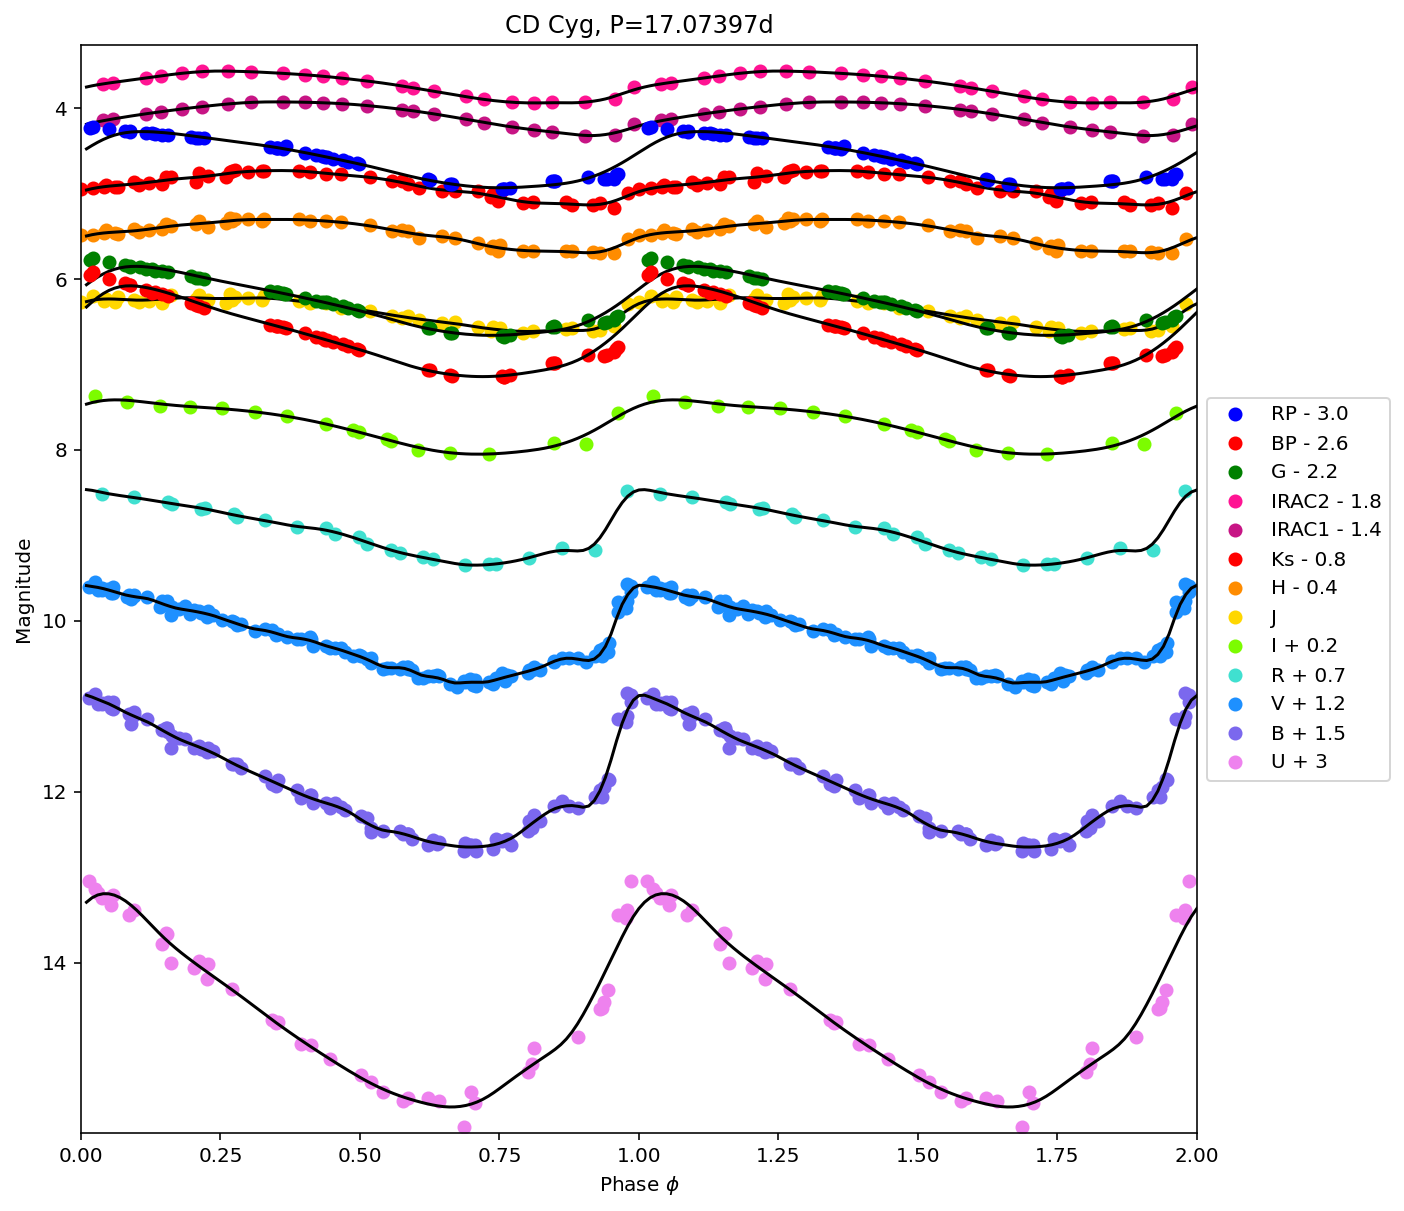

In [200]:
star_name = test_star
fake_phases = -0.99 + 0.01*(np.arange(0,500))

ax_min = 99.
ax_max = -99.

offsets= [3, 1.5, 1.2, 0.7, 0.2, 0, -0.4, -0.8, -1.4, -1.8, -2.2, -2.6, -3.0]
colors = ['Violet', 'MediumSlateBlue', 'DodgerBlue', 'Turquoise', 'LawnGreen', 'Gold', 'DarkOrange', 'Red', 'MediumVioletRed', 'DeepPink', 'Green', 'Red', 'Blue']


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
for i in range(len(filters)):
    if np.nansum(fit_results[i, 200:300])!=0:
        band = filters[i]
        mag_col = 'mag_' + band
        err_col = 'err_' + band
        xx = gloess_input[gloess_input[mag_col].isna()==False]['MJD']
        yy = gloess_input[gloess_input[mag_col].isna()==False][mag_col]
        yerr = gloess_input[gloess_input[mag_col].isna()==False][err_col]
    
        xp = gloess.phase_mjds(xx, period)
        
        if np.sign(offsets[i]) == -1: 
            offstring = ' - ' + str(abs(offsets[i]))
        elif np.sign(offsets[i]) == 0: 
            offstring = ''
        else:
            offstring = ' + ' + str(offsets[i])
        lab_text = band + str(offstring)
        
        ax.plot(np.concatenate((xp, xp+1)), np.concatenate((yy,yy))+offsets[i], marker='o',ls='None', label=lab_text, color=colors[i])
        ax.plot(fake_phases[200:400]-1, fit_results[i, 200:400]+offsets[i], 'k-')
    
        band_min = (fit_results[i, 200:300]+offsets[i]).min()
        band_max = (fit_results[i, 200:300]+offsets[i]).max()
    
        if band_min < ax_min:
            ax_min = band_min
        if band_max > ax_max:
            ax_max = band_max


handles, labels = ax.get_legend_handles_labels() 
plt.legend(handles[::-1],labels[::-1], numpoints=1,loc='center left', bbox_to_anchor=(1, 0.5))
ax.axis([0,2,ax_max+0.3, ax_min-0.3])
plt.title(f'{star_name}, P={period:.5f}d')
ax.set_xlabel('Phase $\phi$')
ax.set_ylabel('Magnitude')

In [81]:
gloess_input[~gloess_input.err_V.isna()]

,MJD,mag_U,err_U,mag_B,err_B,mag_V,err_V,mag_R,err_R,mag_I,...,err_IRAC3,mag_IRAC4,err_IRAC4,Reference,mag_G,err_G,mag_BP,err_BP,mag_RP,err_RP


In [83]:
gloess.yerr

array([0.0028705 , 0.00288273, 0.00285491, 0.0028604 , 0.00284232,
       0.00284154, 0.00285677, 0.00284396, 0.00284385, 0.00284256,
       0.00285731, 0.00285633, 0.00284314, 0.00291276, 0.00293893,
       0.00288242, 0.00285837, 0.00286195, 0.00284974, 0.00286256,
       0.00284578, 0.00294691, 0.00290179, 0.00286552, 0.00285165,
       0.00289311, 0.00286638, 0.00285941, 0.00289887, 0.00279099,
       0.00287334, 0.00287084, 0.00286737, 0.00285966, 0.00287761,
       0.00285344, 0.0028527 , 0.00285737, 0.00284582, 0.00283632,
       0.00285676, 0.00287305, 0.0028829 , 0.00287135, 0.0028705 ,
       0.00288273, 0.00285491, 0.0028604 , 0.00284232, 0.00284154,
       0.00285677, 0.00284396, 0.00284385, 0.00284256, 0.00285731,
       0.00285633, 0.00284314, 0.00291276, 0.00293893, 0.00288242,
       0.00285837, 0.00286195, 0.00284974, 0.00286256, 0.00284578,
       0.00294691, 0.00290179, 0.00286552, 0.00285165, 0.00289311,
       0.00286638, 0.00285941, 0.00289887, 0.00279099, 0.00287

In [159]:
filt_df = pd.read_csv('filter_wavelengths.csv')

In [160]:
filt_df

,band,wavelength_um,zeropoint_Jy,Notes
0,J,1.235,1594.00,NaN
1,H,1.662,1024.00,NaN
2,Ks,2.159,666.70,K short not K
3,IRAC1,3.600,280.90,NaN
4,IRAC2,4.500,179.70,NaN
5,IRAC3,5.800,115.00,NaN
6,IRAC4,8.000,64.13,NaN
7,U,0.360,1755.00,NaN
8,B,0.440,4000.87,NaN
9,V,0.550,3597.28,NaN


In [161]:
filt_df = filt_df.sort_values('wavelength_um').reset_index(drop=True)

In [116]:
#filt_df.to_csv('standard_filter_wavelengths.csv', index=False, header=True)

got rid of the wise bands - fucking up the scaling

In [163]:
filt_df

,band,wavelength_um,zeropoint_Jy,Notes
0,U,0.360,1755.00,NaN
1,B,0.440,4000.87,NaN
2,BP,0.511,3552.00,Gaia DR3
3,V,0.550,3597.28,NaN
4,G,0.622,3229.00,Gaia DR3
5,R,0.710,3080.00,Cousins
6,RP,0.777,2555.00,Gaia DR3
7,I,0.790,2432.84,Cousins
8,J,1.235,1594.00,NaN
9,H,1.662,1024.00,NaN


In [164]:
filters

['U', 'B', 'V', 'R', 'I', 'J', 'H', 'Ks', 'IRAC1', 'IRAC2', 'G', 'BP', 'RP']

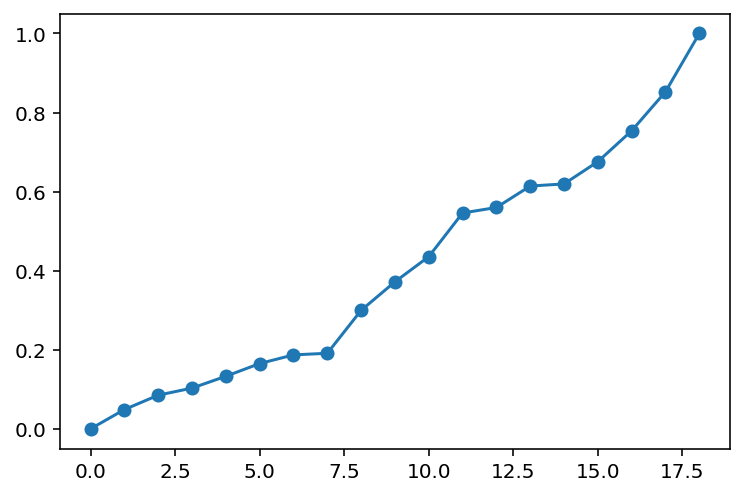

In [140]:
plt.plot((np.log10(filt_df.wavelength_um)-np.log10(0.36))/(np.log10(22.)-np.log10(0.36)), marker='o', ls='-')

In [134]:
np.log10(0.360)

-0.44369749923271273

In [138]:
np.log10(22)

1.3424226808222062

In [139]:
np.log10(22) - np.log10(0.360)

1.786120180054919

In [172]:
def scale_lam_to_col(wavelength, max_w = 4.5, min_w = 0.360):
    """ max and min wavelengths are options corresponding to IRAC4 and U band in microns"""
    scaled_lam = (np.log10(wavelength) - np.log10(min_w)) / (np.log10(max_w) - np.log10(min_w))
    return(scaled_lam)

In [173]:
filt_df['scaled_wl'] = filt_df.apply(lambda x: scale_lam_to_col(x.wavelength_um), axis=1)

In [174]:
filt_df

,band,wavelength_um,zeropoint_Jy,Notes,scaled_wl
0,U,0.360,1755.00,NaN,0.000000
1,B,0.440,4000.87,NaN,0.079451
2,BP,0.511,3552.00,Gaia DR3,0.138679
3,V,0.550,3597.28,NaN,0.167799
4,G,0.622,3229.00,Gaia DR3,0.216506
5,R,0.710,3080.00,Cousins,0.268897
6,RP,0.777,2555.00,Gaia DR3,0.304600
7,I,0.790,2432.84,Cousins,0.311169
8,J,1.235,1594.00,NaN,0.488066
9,H,1.662,1024.00,NaN,0.605636


In [202]:
import matplotlib.cm as cm

cmap = cm.rainbow

In [203]:
filt_df[filt_df.band==filters[1]].scaled_wl.values[0]

0.07945061553400194

In [204]:
filters[0]

'U'

U + 3
B + 1.5
V + 1.2
R + 0.7
I + 0.2
J
H - 0.4
Ks - 0.8
IRAC1 - 1.4
IRAC2 - 1.8
G - 2.2
BP - 2.6
RP - 3.0


Text(0, 0.5, 'Magnitude')

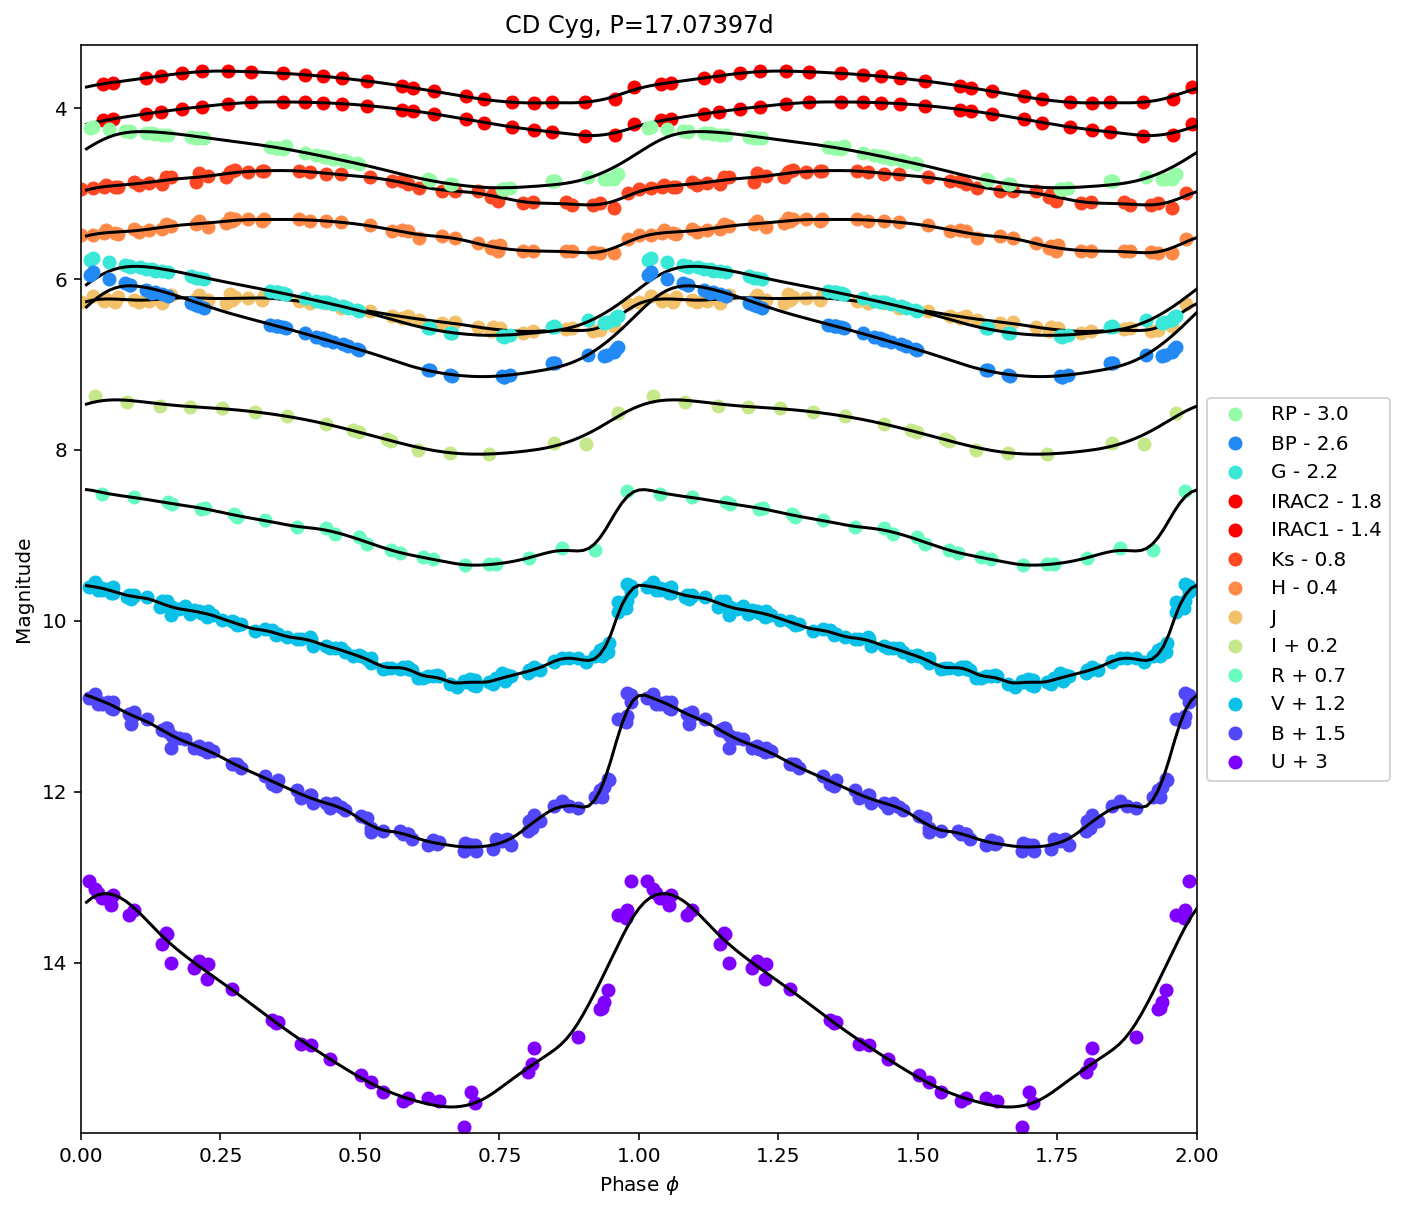

In [229]:
star_name = test_star
fake_phases = -0.99 + 0.01*(np.arange(0,500))

ax_min = 99.
ax_max = -99.

offsets= [3, 1.5, 1.2, 0.7, 0.2, 0, -0.4, -0.8, -1.4, -1.8, -2.2, -2.6, -3.0]
#colors = ['Violet', 'MediumSlateBlue', 'DodgerBlue', 'Turquoise', 'LawnGreen', 'Gold', 'DarkOrange', 'Red', 'MediumVioletRed', 'DeepPink', 'Green', 'Red', 'Blue']
pointcols = cm.get_cmap('rainbow', 12)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
for i in range(len(filters)):
    if np.nansum(fit_results[i, 200:300])!=0:
        band = filters[i]
        mag_col = 'mag_' + band
        err_col = 'err_' + band
        xx = gloess_input[gloess_input[mag_col].isna()==False]['MJD']
        yy = gloess_input[gloess_input[mag_col].isna()==False][mag_col]
        yerr = gloess_input[gloess_input[mag_col].isna()==False][err_col]
    
        xp = gloess.phase_mjds(xx, period)
        
        if np.sign(offsets[i]) == -1: 
            offstring = ' - ' + str(abs(offsets[i]))
        elif np.sign(offsets[i]) == 0: 
            offstring = ''
        else:
            offstring = ' + ' + str(offsets[i])
        lab_text = band + str(offstring)
        print(lab_text)
        filt_no = filt_df[filt_df.band==filters[i]].index.values[0]
        pointcol = pointcols(filt_no)
        ax.plot(np.concatenate((xp, xp+1)), np.concatenate((yy,yy))+offsets[i], marker='o',ls='None', label=lab_text, color=pointcol)#, color=colors[i])
        ax.plot(fake_phases[200:400]-1, fit_results[i, 200:400]+offsets[i], 'k-')
    
        band_min = (fit_results[i, 200:300]+offsets[i]).min()
        band_max = (fit_results[i, 200:300]+offsets[i]).max()
    
        if band_min < ax_min:
            ax_min = band_min
        if band_max > ax_max:
            ax_max = band_max


handles, labels = ax.get_legend_handles_labels() 
plt.legend(handles[::-1],labels[::-1], numpoints=1,loc='center left', bbox_to_anchor=(1, 0.5))
ax.axis([0,2,ax_max+0.3, ax_min-0.3])
plt.title(f'{star_name}, P={period:.5f}d')
ax.set_xlabel('Phase $\phi$')
ax.set_ylabel('Magnitude')

In [151]:
filters

['U', 'B', 'V', 'R', 'I', 'J', 'H', 'Ks', 'IRAC1', 'IRAC2', 'G', 'BP', 'RP']

In [191]:
monson_phot

,cep_name,hmjd,mag_IRAC1,err_IRAC1,mag_IRAC2,err_IRAC2,MJD
0,beta Dor,55138.0119,1.809,0.019,1.793,0.010,2.455139e+06
1,beta Dor,55140.2499,1.779,0.021,1.819,0.004,2.455141e+06
2,beta Dor,55140.9730,1.805,0.018,1.864,0.006,2.455141e+06
3,beta Dor,55142.0659,1.876,0.019,1.939,0.007,2.455143e+06
4,beta Dor,55142.8811,1.933,0.009,1.969,0.008,2.455143e+06
...,...,...,...,...,...,...,...
882,l Car,55328.5307,0.823,0.012,1.003,0.007,2.455329e+06
883,l Car,55329.8869,0.861,0.012,1.035,0.004,2.455330e+06
884,l Car,55330.9327,0.869,0.016,1.043,0.008,2.455331e+06
885,l Car,55333.3785,0.917,0.017,1.099,0.009,2.455334e+06


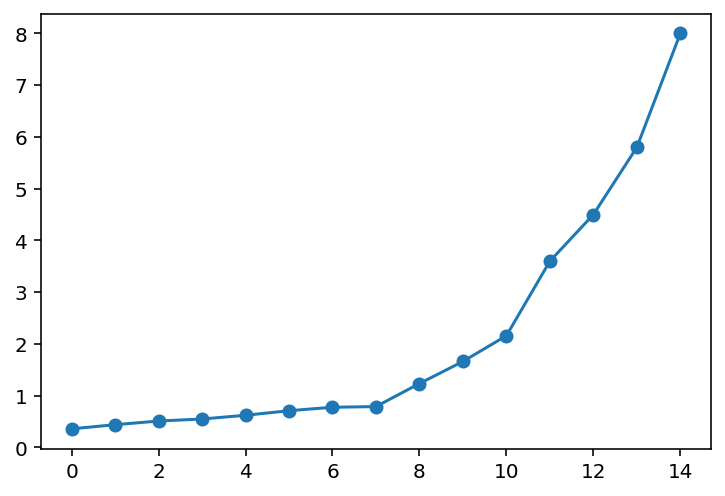

In [207]:
plt.plot(filt_df.wavelength_um, marker='o')

In [208]:
def scale_lam_to_col_not_log(wavelength, max_w = 4.5, min_w = 0.360):
    """ max and min wavelengths are options corresponding to IRAC4 and U band in microns"""
    scaled_lam = ((wavelength) - (min_w)) / ((max_w) - (min_w))
    return(scaled_lam)

In [209]:
filt_df['scaled_wl_lin'] = filt_df.apply(lambda x: scale_lam_to_col_not_log(x.wavelength_um), axis=1)


In [210]:
filt_df

,band,wavelength_um,zeropoint_Jy,Notes,scaled_wl,scaled_wl_lin
0,U,0.360,1755.00,NaN,0.000000,0.000000
1,B,0.440,4000.87,NaN,0.079451,0.019324
2,BP,0.511,3552.00,Gaia DR3,0.138679,0.036473
3,V,0.550,3597.28,NaN,0.167799,0.045894
4,G,0.622,3229.00,Gaia DR3,0.216506,0.063285
5,R,0.710,3080.00,Cousins,0.268897,0.084541
6,RP,0.777,2555.00,Gaia DR3,0.304600,0.100725
7,I,0.790,2432.84,Cousins,0.311169,0.103865
8,J,1.235,1594.00,NaN,0.488066,0.211353
9,H,1.662,1024.00,NaN,0.605636,0.314493


In [211]:
pointcols = cm.get_cmap('rainbow', 14)

In [215]:
pointcols(0)

(0.5, 0.0, 1.0, 1.0)

In [226]:
filt_no = filt_df[filt_df.band==filters[i]].index.values[0]


In [227]:
filt_no

0

In [ ]:
monson_phot['cep_name'].